In [86]:
from sklearn.datasets import load_boston
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time

from sklearn import datasets, linear_model
from sklearn import metrics, cross_validation
from sklearn.utils import shuffle

In [87]:
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [88]:
type(boston)

sklearn.datasets.base.Bunch

In [89]:
print(boston.DESCR)
print(boston.keys())
print(boston.feature_names)
print(boston.data.shape)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [90]:
X = boston.data

In [91]:
X[0:2, :]

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00,
          0.00000000e+00,   5.38000000e-01,   6.57500000e+00,
          6.52000000e+01,   4.09000000e+00,   1.00000000e+00,
          2.96000000e+02,   1.53000000e+01,   3.96900000e+02,
          4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00,
          0.00000000e+00,   4.69000000e-01,   6.42100000e+00,
          7.89000000e+01,   4.96710000e+00,   2.00000000e+00,
          2.42000000e+02,   1.78000000e+01,   3.96900000e+02,
          9.14000000e+00]])

In [92]:
y = boston.target

In [93]:
y[0:2]

array([ 24. ,  21.6])

## Prepare train/test sets

In [94]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.33, random_state = 5)

print("X_train shape: " + str(X_train.shape))
print("y_train shape: " + str(y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("y_test shape: " + str(y_test.shape))

X_train shape: (339, 13)
y_train shape: (339,)
X_test shape: (167, 13)
y_test shape: (167,)


## Define helper function

In [95]:
def plot_actual_over_predicted(y_actual, y_pred):
    plt.scatter(y_actual, y_pred)
    plt.xlabel("Prices: $Y_i$")
    plt.ylabel("Predicted prices: $\hat{Y}_i$")
    plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
    plt.show()
    
def log_gradient_descent_step(it, theta, error):
     if (debug):
        print("Iteration: " + str(it))    
        print("  Theta: " + str(theta))
        print("  Error: " + str(error))
        
def calculate_cost_of_theta(X_train, y_train, X_test, y_test, theta):
    mse_on_train = mean_squared_error(X_train, y_train, theta)
    mse_on_test = mean_squared_error(X_test, y_test, theta)
    print('Theta: \n', theta)
    print("Mean squared error (train):", mse_on_train)
    print("Mean squared error (test):", mse_on_test)
        
def run_timed(func):
    start = time.clock()
    results = func()
    print("Time taken:", time.clock() - start)
    return results


## Define linear regression functions

In [96]:
def sum_squared_error(X, y, theta):
    hypothesis = X.dot(theta.T)
    square_of_errors = np.square(hypothesis - y)
    return np.sum(square_of_errors)

def mean_squared_error(X, y, theta):
    m = X.shape[0]
    return (1 / (m)) * sum_squared_error(X, y, theta)
    
def gradient(X, y, theta):
    m = X.shape[0]
    hypothesis = X.dot(theta.T)
    error = hypothesis - y
    gradient = (1/m) * X.T.dot(error)
    return (gradient, error)
    
def gradient_descent_full_batch(X, y, theta, alpha, iterations):
    m = X.shape[0]
    for i in range(iterations):
        # Move in opposite direction to gradient, hence minus gradient.
        # Alpha seems to temper the gradient change, preventing huge swings. It should be low.
        grad, error = gradient(X, y, theta)
        theta = theta - (alpha * grad)
        log_gradient_descent_step(i, theta, error)
            
    return theta

def gradient_descent_stochastic(X, y, theta, alpha, iterations):
    for i in range(iterations):
        X, y = shuffle(X, y, random_state=0)
        # theta is updated after calculating gradient for just one example
        # This is cheaper than calculating gradient across all examples, before adjusting theta \
        # especially where we have a huge number of examples
        for j, _ in enumerate(X):
            grad, error = gradient(X[j], y[j], theta)
            theta = theta - (alpha * grad)
            
        log_gradient_descent_step(i, theta, error)
        
    return theta

## Test linear regression on limited data set

In [97]:
debug = True    

t_X = np.array([[1, 2, 3],[4, 5, 6]])
t_y = [6, 15]
t_theta = np.array([2, 1, 1])
print("Theta: " + str(t_theta))

# Test cost function
cost = mean_squared_error(t_X, t_y, t_theta)
print("Cost: " + str(cost))
    
# Test gradient function
g, e = gradient(t_X, t_y, t_theta)
print("Gradient: " + str(g))

# Test gradient descent full batch
print("Testing gradient descent full batch")
t_initial_theta = np.array([4,3,2])
optimised_theta = gradient_descent_full_batch(t_X, t_y, t_initial_theta, 0.01, 100)
mse = mean_squared_error(t_X, t_y, optimised_theta)
print("Optimised theta: " + str(optimised_theta))
print("Optimised theta cost: " + str(mse))

# Test gradient descent stochastic
print("Testing gradient descent stochastic")
optimised_theta = gradient_descent_stochastic(t_X, t_y, t_initial_theta, 0.01, 100)
mse = mean_squared_error(t_X, t_y, optimised_theta)
print("Optimised theta: " + str(optimised_theta))
print("Optimised theta cost: " + str(mse))

Theta: [2 1 1]
Cost: 8.5
Gradient: [  8.5  11.   13.5]
Testing gradient descent full batch
Iteration: 0
  Theta: [ 3.39  2.2   1.01]
  Error: [10 28]
Iteration: 1
  Theta: [ 3.0535  1.7613  0.4691]
  Error: [  4.82  15.62]
Iteration: 2
  Theta: [ 2.866881   1.5205885  0.174296 ]
  Error: [ 1.9834  8.8351]
Iteration: 3
  Theta: [ 2.76240142  1.38837298  0.01434453]
  Error: [ 0.430946   5.1162425]
Iteration: 4
  Theta: [ 2.70293976  1.31561272 -0.07171431]
  Error: [-0.41781902  3.07753778]
Iteration: 5
  Theta: [ 2.66815391  1.27543408 -0.11728575]
  Error: [-0.88097773  1.95953678]
Iteration: 6
  Theta: [ 2.64689666  1.25311064 -0.14067537]
  Error: [-1.13283518  1.34607155]
Iteration: 7
  Theta: [ 2.63305945  1.24057253 -0.15191438]
  Error: [-1.26890816  1.00908763]
Iteration: 8
  Theta: [ 2.62329485  1.23339757 -0.15649972]
  Error: [-1.34153861  0.8236142 ]
Iteration: 9
  Theta: [ 2.61576852  1.22916243 -0.15744365]
  Error: [-1.37940918  0.72116891]
Iteration: 10
  Theta: [ 2.609

## Run Linear Regression From Scikit-learn

<b>Provides some results to compare against</b>

Coefficients: 
 [ -1.56381297e-01   3.85490972e-02  -2.50629921e-02   7.86439684e-01
  -1.29469121e+01   4.00268857e+00  -1.16023395e-02  -1.36828811e+00
   3.41756915e-01  -1.35148823e-02  -9.88866034e-01   1.20588215e-02
  -4.72644280e-01]
Mean squared error (train): 19.55
Mean squared error (test): 28.54


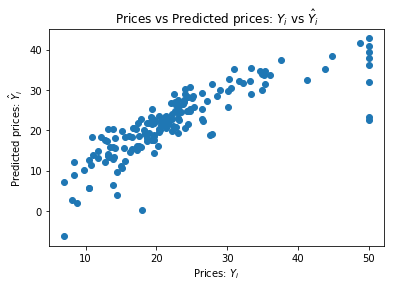

In [98]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print('Coefficients: \n', regr.coef_)
print("Mean squared error (train): %.2f" % metrics.mean_squared_error(y_train, regr.predict(X_train)))
print("Mean squared error (test): %.2f" % metrics.mean_squared_error(y_test, y_pred))

plot_actual_over_predicted(y_test, y_pred)

## Run Linear Regression With Full Batch Gradient Descent

Theta: 
 [ 0.6521843   0.7391585   0.45290586  0.97423297  0.76216044  0.12285274
  0.28310283  0.79183586  0.50879608  0.01849603  0.24763137  0.08149256
  0.32213923]
Mean squared error (train): 4907.88496392
Mean squared error (test): 5054.79203203


Time taken: 8.86854500000004
Theta: 
 [-0.14620415  0.06687062 -0.03256726  1.01844856  0.89998193  3.34633695
  0.03984749 -0.32986402  0.18726825 -0.00815835  0.0137001   0.02233085
 -0.58570047]
Mean squared error (train): 26.2609696338
Mean squared error (test): 34.9841490523


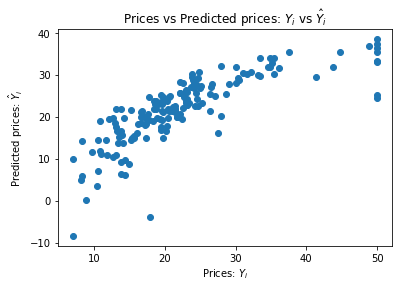

In [99]:
debug = False
num_of_iterations = 300000
alpha = 0.000004 # learning rate

initial_theta = np.random.rand((X.shape[1]))
calculate_cost_of_theta(X_train, y_train, X_test, y_test, initial_theta)

print('\n')

optimised_theta = run_timed(lambda: gradient_descent_full_batch(X_train, y_train, initial_theta, alpha, num_of_iterations))
calculate_cost_of_theta(X_train, y_train, X_test, y_test, optimised_theta)

y_pred = X_test.dot(optimised_theta.T)
plot_actual_over_predicted(y_test, y_pred)

## Run Linear Regression With Stochastic Gradient Descent

Theta: 
 [ 0.61043839  0.94948468  0.46793571  0.46495583  0.80428553  0.03632433
  0.89158486  0.24291378  0.45863894  0.71710176  0.2792267   0.52963979
  0.0053605 ]
Mean squared error (train): 316109.40493
Mean squared error (test): 322992.955703


Time taken: 6.495842999999979
Theta: 
 [-0.1399946   0.08065476 -0.03768354  0.52036578  0.90619526  2.49954261
  0.05687875 -0.25703561  0.17125112 -0.00633436  0.21798801  0.02209185
 -0.65281395]
Mean squared error (train): 30.0915488536
Mean squared error (test): 38.2243519602


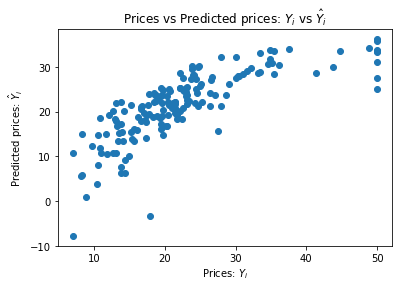

In [100]:
debug = False
num_of_iterations = 3000
alpha = 0.00001 # learning rate

initial_theta = np.random.rand((X.shape[1]))
calculate_cost_of_theta(X_train, y_train, X_test, y_test, initial_theta)

print('\n')

optimised_theta = run_timed(lambda: gradient_descent_stochastic(X_train, y_train, initial_theta, alpha, num_of_iterations))
calculate_cost_of_theta(X_train, y_train, X_test, y_test, optimised_theta)

y_pred = X_test.dot(optimised_theta.T)
plot_actual_over_predicted(y_test, y_pred)